# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
!pip install alpaca_trade_api

In [3]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [5]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19020068,
            "id": 1,
            "last_updated": 1650736927,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 757502867968,
                    "percent_change_1h": -0.0561189836694397,
                    "percent_change_24h": 1.27884065315418,
                    "percent_change_7d": -1.80958237729344,
                    "percentage_change_1h": -0.0561189836694397,
                    "percentage_change_24h": 1.27884065315418,
                    "percentage_change_7d": -1.80958237729344,
                    "price": 39852.0,
                    "volume_24h": 35887979884
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19020068,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [8]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120498453,
            "id": 1027,
            "last_updated": 1650737023,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 357034249931,
                    "percent_change_1h": -0.0756929286459656,
                    "percent_change_24h": 0.356470211993194,
                    "percent_change_7d": -2.68788483085771,
                    "percentage_change_1h": -0.0756929286459656,
                    "percentage_change_24h": 0.356470211993194,
                    "percentage_change_7d": -2.68788483085771,
                    "price": 2963.57,
                    "volume_24h": 9978610397
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120498453,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptoc

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [9]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']


# Print the current price of BTC
print(f"The price for Bitcoin is ${btc_price}")


The price for Bitcoin is $39852.0


In [10]:
# Navigate the BTC response object to access the current price of ETH
eth_price =  eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The price for Ethereum is ${eth_price}")



The price for Ethereum is $2963.57


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [11]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(btc_value)


47822.4


In [12]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(eth_value)


15706.921


In [13]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value 

# Print current cryptocurrency wallet balance
print(total_crypto_wallet)


63529.321


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [14]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [15]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-05", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df =  pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-01-03 05:00:00+00:00  476.45  477.85  473.85  477.71   72859933   
2022-01-04 05:00:00+00:00  479.26  479.98  475.58  477.55   72130318   
2022-01-05 05:00:00+00:00  477.25  477.98  468.29  468.38  102090390   
2022-01-06 05:00:00+00:00  468.00  470.82  465.43  467.94   86899217   
2022-01-07 05:00:00+00:00  468.00  469.20  464.65  466.09   84914433   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2022-01-03 05:00:00+00:00      534806  476.520945  113.67  113.6753  113.300   
2022-01-04 05:00:00+00:00      565261  477.865001  113.22  113.3000  113.075   
2022-01-05 05:00:00+00:00      784963  473.338870  113.34  113.3600  112.900   
2022-01-06 05:00:00+00:00      803299  468.482337  112.75  112.8400  112.660   
2022-01-07 05:00:00+00:00      623751  466.942032  112.69  112.7050  112.340   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-01-03 05:00:00+00:00  113.30  9398873       30228  113.467418  
2022-01-04 05:00:00+00:00  113.29  7769088       31298  113.183583  
2022-01-05 05:00:00+00:00  112.94  8025339       26819  113.102165  
2022-01-06 05:00:00+00:00  112.82  8859820       24721  112.771554  
2022-01-07 05:00:00+00:00  112.49  9018694       32424  112.502900

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = prices_df["AGG"]["close"][0]

# Print the AGG closing price
agg_close_price


113.3

In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = prices_df["SPY"]["close"][0]

# Print the SPY closing price
spy_close_price


477.71

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(agg_value)


22660.0


In [21]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(spy_value)


52548.1


In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value * spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(total_stocks_bonds)

1190739946.0


In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(total_portfolio)


1190803475.321


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list
savings_data = [
    total_crypto_wallet,
    total_stocks_bonds
]
# Review the Python list savings_data
savings_data
    

[63529.321, 1190739946.0]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [25]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns = ['amount'], index = ['cryto', 'stocks/bonds'])


# Display the savings_df DataFrame
savings_df


,amount
cryto,6.352932e+04
stocks/bonds,1.190740e+09


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Savings Composition'}, ylabel='amount'>

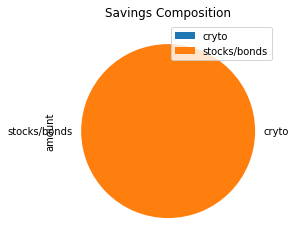

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot(kind = 'pie', y='amount', title = 'Savings Composition')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [27]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congrats! You have more than enough money in your account.')
elif total_portfolio == emergency_fund_value:
    print('Great job. You have reached this important financial goal')
else:
    print(f'You are $(emergency_fund_value - total_portfolio) from reaching your financial goal.')


Congrats! You have more than enough money in your account.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [29]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2022-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-05", tz="America/New_York").isoformat()


# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [30]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df =  pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Display both the first and last five rows of the DataFrame
display(prices_df.head())
display(prices_df.tail())


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-01-03 05:00:00+00:00  476.45  477.85  473.85  477.71   72859933   
2022-01-04 05:00:00+00:00  479.26  479.98  475.58  477.55   72130318   
2022-01-05 05:00:00+00:00  477.25  477.98  468.29  468.38  102090390   
2022-01-06 05:00:00+00:00  468.00  470.82  465.43  467.94   86899217   
2022-01-07 05:00:00+00:00  468.00  469.20  464.65  466.09   84914433   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2022-01-03 05:00:00+00:00      534806  476.520945  113.67  113.6753  113.300   
2022-01-04 05:00:00+00:00      565261  477.865001  113.22  113.3000  113.075   
2022-01-05 05:00:00+00:00      784963  473.338870  113.34  113.3600  112.900   
2022-01-06 05:00:00+00:00      803299  468.482337  112.75  112.8400  112.660   
2022-01-07 05:00:00+00:00      623751  466.942032  112.69  112.7050  112.340   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-01-03 05:00:00+00:00  113.30  9398873       30228  113.467418  
2022-01-04 05:00:00+00:00  113.29  7769088       31298  113.183583  
2022-01-05 05:00:00+00:00  112.94  8025339       26819  113.102165  
2022-01-06 05:00:00+00:00  112.82  8859820       24721  112.771554  
2022-01-07 05:00:00+00:00  112.49  9018694       32424  112.502900

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-02-28 05:00:00+00:00  432.23  438.20  430.70  436.63  139634305   
2022-03-01 05:00:00+00:00  435.12  437.17  427.21  429.98  132857631   
2022-03-02 05:00:00+00:00  432.30  439.72  431.57  437.89  113504091   
2022-03-03 05:00:00+00:00  440.59  441.11  433.80  435.77   99686399   
2022-03-04 05:00:00+00:00  431.69  433.37  427.88  432.10  108964209   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2022-02-28 05:00:00+00:00     1237484  434.582219  110.03  110.43  110.020   
2022-03-01 05:00:00+00:00     1350987  431.675336  110.60  111.17  110.570   
2022-03-02 05:00:00+00:00     1192990  436.227698  110.30  110.38  109.460   
2022-03-03 05:00:00+00:00      991257  436.940856  109.80  110.00  109.650   
2022-03-04 05:00:00+00:00     1043164  430.912347  110.38  110.55  110.225   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-02-28 05:00:00+00:00  110.36  15026067       34672  110.285559  
2022-03-01 05:00:00+00:00  110.82  14248500       39215  110.836369  
2022-03-02 05:00:00+00:00  109.49   8489288       27605  109.930996  
2022-03-03 05:00:00+00:00  109.86  15477951       47769  109.822043  
2022-03-04 05:00:00+00:00  110.30   8116629       26863  110.381556

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [31]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
mc_thirty_year = MCSimulation(
    prices_df,
    weights= [.4 , .6],
    num_simulation= 100,
    num_trading_days= 252 * 30
)

# Review the simulation input data
mc_thirty_year.portfolio_data


SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2022-01-03 05:00:00+00:00  476.45  477.8500  473.8500  477.71   72859933   
2022-01-04 05:00:00+00:00  479.26  479.9800  475.5800  477.55   72130318   
2022-01-05 05:00:00+00:00  477.25  477.9800  468.2900  468.38  102090390   
2022-01-06 05:00:00+00:00  468.00  470.8200  465.4300  467.94   86899217   
2022-01-07 05:00:00+00:00  468.00  469.2000  464.6500  466.09   84914433   
2022-01-10 05:00:00+00:00  462.74  465.7400  456.5973  465.51  118730388   
2022-01-11 05:00:00+00:00  465.24  469.8500  462.0500  469.75   74853263   
2022-01-12 05:00:00+00:00  471.65  473.2000  468.9400  471.02   67759128   
2022-01-13 05:00:00+00:00  472.20  472.8800  463.4400  464.53   90971413   
2022-01-14 05:00:00+00:00  461.10  465.0900  459.9000  464.72   95697900   
2022-01-18 05:00:00+00:00  459.84  459.9600  455.3100  456.49  109728067   
2022-01-19 05:00:00+00:00  458.19  459.6124  451.4600  451.75  108201413   
2022-01-20 05:00:00+00:00  453.75  458.7400  444.5000  446.75  121688459   
2022-01-21 05:00:00+00:00  445.45  448.0600  437.9500  437.98  202610317   
2022-01-24 05:00:00+00:00  432.00  440.3800  420.7600  439.84  246897306   
2022-01-25 05:00:00+00:00  433.19  439.7200  364.6800  434.47  167908407   
2022-01-26 05:00:00+00:00  441.62  444.0400  428.8600  433.38  182054779   
2022-01-27 05:00:00+00:00  438.13  441.5800  429.4500  431.24  149657212   
2022-01-28 05:00:00+00:00  432.70  442.0000  427.8200  441.95  164045862   
2022-01-31 05:00:00+00:00  441.44  450.2800  439.8100  449.91  151973284   
2022-02-01 05:00:00+00:00  450.64  453.6300  446.9384  452.95  122606348   
2022-02-02 05:00:00+00:00  455.50  458.1200  453.0500  457.35  117353542   
2022-02-03 05:00:00+00:00  450.93  452.9700  445.7100  446.60  117670723   
2022-02-04 05:00:00+00:00  446.24  452.7800  443.8300  448.70  119546087   
2022-02-07 05:00:00+00:00  449.50  450.9900  445.8500  447.26   84271700   
2022-02-08 05:00:00+00:00  446.66  451.9200  445.2200  450.94   80723600   
2022-02-09 05:00:00+00:00  455.29  457.8800  455.0050  457.54   90105650   
2022-02-10 05:00:00+00:00  451.40  457.7100  447.2000  449.32  136707627   
2022-02-11 05:00:00+00:00  449.30  451.6050  438.9400  440.46  147819260   
2022-02-14 05:00:00+00:00  439.88  441.6000  435.3400  439.02  116797833   
2022-02-15 05:00:00+00:00  443.86  446.2800  443.1800  446.10   86214317   
2022-02-16 05:00:00+00:00  443.94  448.0550  441.9400  446.60   80837488   
2022-02-17 05:00:00+00:00  443.18  446.5652  436.4200  437.08   96702624   
2022-02-18 05:00:00+00:00  437.51  438.6600  431.8200  434.31  127857744   
2022-02-22 05:00:00+00:00  431.95  435.5000  425.8600  429.57  120256973   
2022-02-23 05:00:00+00:00  432.65  433.2600  421.3500  422.07  126065955   
2022-02-24 05:00:00+00:00  411.00  428.7600  410.6400  428.30  213249029   
2022-02-25 05:00:00+00:00  429.55  437.8400  427.8600  437.75  116947965   
2022-02-28 05:00:00+00:00  432.23  438.2000  430.7000  436.63  139634305   
2022-03-01 05:00:00+00:00  435.12  437.1700  427.2100  429.98  132857631   
2022-03-02 05:00:00+00:00  432.30  439.7200  431.5700  437.89  113504091   
2022-03-03 05:00:00+00:00  440.59  441.1100  433.8000  435.77   99686399   
2022-03-04 05:00:00+00:00  431.69  433.3700  427.8800  432.10  108964209   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2022-01-03 05:00:00+00:00      534806  476.520945          NaN  113.67   
2022-01-04 05:00:00+00:00      565261  477.865001    -0.000335  113.22   
2022-01-05 05:00:00+00:00      784963  473.338870    -0.019202  113.34   
2022-01-06 05:00:00+00:00      803299  468.482337    -0.000939  112.75   
2022-01-07 05:0

In [32]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003840,0.999899,1.001664,0.982248,1.003507,0.990993,0.992782,1.004315,0.990550,1.002358,...,1.003132,0.998448,1.001357,0.994529,0.999247,0.993332,1.012403,0.995639,0.998725,0.997092
2,1.010172,0.996762,0.988911,0.981294,1.004490,0.985276,0.988292,1.005002,0.977455,1.014298,...,1.002856,0.999012,0.992350,0.998343,1.001446,0.994909,1.011985,1.000078,0.995360,1.005609
3,1.008390,1.001430,0.980564,0.981627,1.012364,0.988011,0.990298,1.007903,0.982773,1.012028,...,0.997790,0.996397,0.997675,1.000139,0.997526,0.993108,1.000364,1.008767,0.993589,1.002974
4,1.019477,1.000697,0.972764,0.975406,1.005482,0.985460,0.988586,1.015935,0.980579,1.012608,...,1.002930,1.000331,1.003750,0.992210,0.991326,0.996766,0.997158,1.013474,0.978850,0.997624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.000070,0.000090,0.000041,0.000066,0.000040,0.000031,0.000040,0.000057,0.000037,0.000030,...,0.000035,0.000025,0.000059,0.000125,0.000072,0.000089,0.000036,0.000101,0.000053,0.000084
7557,0.000070,0.000090,0.000041,0.000066,0.000040,0.000031,0.000040,0.000057,0.000037,0.000030,...,0.000035,0.000025,0.000059,0.000124,0.000072,0.000090,0.000036,0.000100,0.000053,0.000084
7558,0.000070,0.000091,0.000041,0.000067,0.000040,0.000031,0.000040,0.000057,0.000037,0.000031,...,0.000035,0.000025,0.000058,0.000125,0.000071,0.000090,0.000036,0.000099,0.000053,0.000084
7559,0.000070,0.000091,0.000041,0.000067,0.000039,0.000031,0.000040,0.000057,0.000038,0.000031,...,0.000035,0.000025,0.000058,0.000124,0.000071,0.000089,0.000035,0.000099,0.000053,0.000084


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

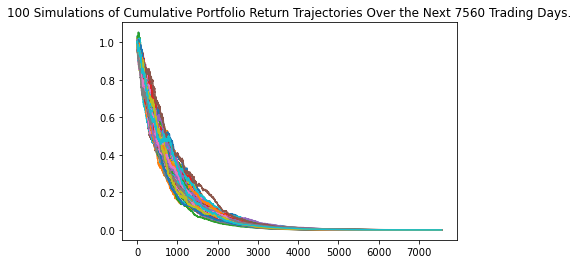

In [33]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
mc_thirty_year.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

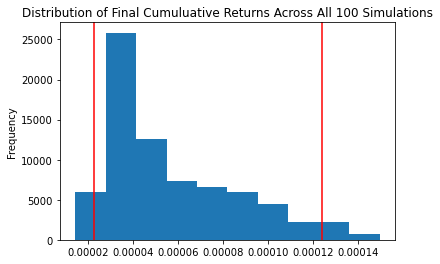

In [34]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
mc_thirty_year.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [35]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
summary = mc_thirty_year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
summary

count           100.000000
mean              0.000057
std               0.000030
min               0.000014
25%               0.000034
50%               0.000045
75%               0.000075
max               0.000150
95% CI Lower      0.000022
95% CI Upper      0.000124
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [36]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


1190739946.0

In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(summary[8] * total_crypto_wallet, 2)
ci_upper_thirty_cumulative_return = round(summary[9] * total_crypto_wallet, 2)

# Print the result of your calculations
print(f'''With the current given value of the stocks/bonds holdings, the cumulative return over the next 30 years is predicted to be between ${ci_lower_thirty_cumulative_return} and 
${ci_upper_thirty_cumulative_return}''')


With the current given value of the stocks/bonds holdings, the cumulative return over the next 30 years is predicted to be between $1.42 and 
$7.88


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [38]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
mc_ten_year = MCSimulation(
    prices_df,
    weights= [20 , 80],
    num_simulation= 100,
    num_trading_days= 252 * 30
)

# Review the simulation input data
mc_ten_year.portfolio_data


SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2022-01-03 05:00:00+00:00  476.45  477.8500  473.8500  477.71   72859933   
2022-01-04 05:00:00+00:00  479.26  479.9800  475.5800  477.55   72130318   
2022-01-05 05:00:00+00:00  477.25  477.9800  468.2900  468.38  102090390   
2022-01-06 05:00:00+00:00  468.00  470.8200  465.4300  467.94   86899217   
2022-01-07 05:00:00+00:00  468.00  469.2000  464.6500  466.09   84914433   
2022-01-10 05:00:00+00:00  462.74  465.7400  456.5973  465.51  118730388   
2022-01-11 05:00:00+00:00  465.24  469.8500  462.0500  469.75   74853263   
2022-01-12 05:00:00+00:00  471.65  473.2000  468.9400  471.02   67759128   
2022-01-13 05:00:00+00:00  472.20  472.8800  463.4400  464.53   90971413   
2022-01-14 05:00:00+00:00  461.10  465.0900  459.9000  464.72   95697900   
2022-01-18 05:00:00+00:00  459.84  459.9600  455.3100  456.49  109728067   
2022-01-19 05:00:00+00:00  458.19  459.6124  451.4600  451.75  108201413   
2022-01-20 05:00:00+00:00  453.75  458.7400  444.5000  446.75  121688459   
2022-01-21 05:00:00+00:00  445.45  448.0600  437.9500  437.98  202610317   
2022-01-24 05:00:00+00:00  432.00  440.3800  420.7600  439.84  246897306   
2022-01-25 05:00:00+00:00  433.19  439.7200  364.6800  434.47  167908407   
2022-01-26 05:00:00+00:00  441.62  444.0400  428.8600  433.38  182054779   
2022-01-27 05:00:00+00:00  438.13  441.5800  429.4500  431.24  149657212   
2022-01-28 05:00:00+00:00  432.70  442.0000  427.8200  441.95  164045862   
2022-01-31 05:00:00+00:00  441.44  450.2800  439.8100  449.91  151973284   
2022-02-01 05:00:00+00:00  450.64  453.6300  446.9384  452.95  122606348   
2022-02-02 05:00:00+00:00  455.50  458.1200  453.0500  457.35  117353542   
2022-02-03 05:00:00+00:00  450.93  452.9700  445.7100  446.60  117670723   
2022-02-04 05:00:00+00:00  446.24  452.7800  443.8300  448.70  119546087   
2022-02-07 05:00:00+00:00  449.50  450.9900  445.8500  447.26   84271700   
2022-02-08 05:00:00+00:00  446.66  451.9200  445.2200  450.94   80723600   
2022-02-09 05:00:00+00:00  455.29  457.8800  455.0050  457.54   90105650   
2022-02-10 05:00:00+00:00  451.40  457.7100  447.2000  449.32  136707627   
2022-02-11 05:00:00+00:00  449.30  451.6050  438.9400  440.46  147819260   
2022-02-14 05:00:00+00:00  439.88  441.6000  435.3400  439.02  116797833   
2022-02-15 05:00:00+00:00  443.86  446.2800  443.1800  446.10   86214317   
2022-02-16 05:00:00+00:00  443.94  448.0550  441.9400  446.60   80837488   
2022-02-17 05:00:00+00:00  443.18  446.5652  436.4200  437.08   96702624   
2022-02-18 05:00:00+00:00  437.51  438.6600  431.8200  434.31  127857744   
2022-02-22 05:00:00+00:00  431.95  435.5000  425.8600  429.57  120256973   
2022-02-23 05:00:00+00:00  432.65  433.2600  421.3500  422.07  126065955   
2022-02-24 05:00:00+00:00  411.00  428.7600  410.6400  428.30  213249029   
2022-02-25 05:00:00+00:00  429.55  437.8400  427.8600  437.75  116947965   
2022-02-28 05:00:00+00:00  432.23  438.2000  430.7000  436.63  139634305   
2022-03-01 05:00:00+00:00  435.12  437.1700  427.2100  429.98  132857631   
2022-03-02 05:00:00+00:00  432.30  439.7200  431.5700  437.89  113504091   
2022-03-03 05:00:00+00:00  440.59  441.1100  433.8000  435.77   99686399   
2022-03-04 05:00:00+00:00  431.69  433.3700  427.8800  432.10  108964209   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2022-01-03 05:00:00+00:00      534806  476.520945          NaN  113.67   
2022-01-04 05:00:00+00:00      565261  477.865001    -0.000335  113.22   
2022-01-05 05:00:00+00:00      784963  473.338870    -0.019202  113.34   
2022-01-06 05:00:00+00:00      803299  468.482337    -0.000939  112.75   
2022-01-07 05:0

In [39]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.675047,0.661430,0.491974,0.221052,-0.095213,0.948614,0.893633,0.977690,0.728338,1.417732,...,0.904263,1.123354,0.756286,0.638783,1.136586,1.033201,0.843199,1.541330,0.421137,0.953849
2,0.959132,0.391576,0.134642,0.086932,-0.067829,1.115391,0.349015,0.720639,0.770228,1.884227,...,0.474172,1.070761,0.422617,0.598664,0.993792,1.040347,1.092890,1.280271,0.344184,0.740597
3,1.040230,0.630696,0.102837,0.097596,-0.067674,0.400219,0.263933,0.800002,1.224270,-0.402595,...,0.638619,-0.131330,0.539682,0.798942,1.023632,1.129237,1.062948,1.253502,0.353143,0.016867
4,0.707008,0.693836,0.057700,0.108094,-0.062654,-0.040748,0.146079,0.380864,0.776210,-0.485334,...,1.255773,-0.173734,0.115643,0.557700,0.939194,0.800465,0.487950,1.867737,0.199566,0.012347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,...,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
7557,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,...,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
7558,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,...,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
7559,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,...,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

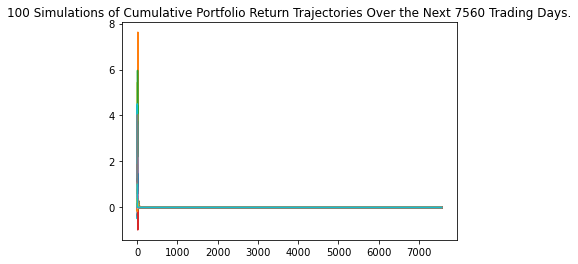

In [40]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
mc_ten_year.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

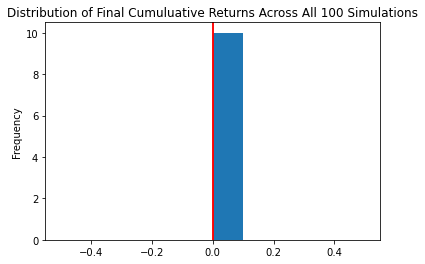

In [41]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
mc_ten_year.plot_distribution()



In [42]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
summary = mc_ten_year.summarize_cumulative_return()



# Review the 10-year Monte Carlo summary statistics
summary

count           100.0
mean              0.0
std               0.0
min              -0.0
25%               0.0
50%               0.0
75%               0.0
max              -0.0
95% CI Lower      0.0
95% CI Upper      0.0
Name: 7560, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [43]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


1190739946.0

In [44]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(summary[8] * total_crypto_wallet, 2)
ci_upper_ten_cumulative_return = round(summary[9] * total_crypto_wallet, 2)


# Print the result of your calculations
print(f'''With the current given value of the stocks/bonds holdings, the cumulative return over the next 10 years is predicted to be between ${ci_lower_ten_cumulative_return} and 
${ci_upper_ten_cumulative_return}''')



With the current given value of the stocks/bonds holdings, the cumulative return over the next 10 years is predicted to be between $0.0 and 
$0.0


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?